# **Titanic**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
df=pd.read_csv("/content/drive/MyDrive/Titanic-Dataset.csv") #importing the dataset
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.isna().sum().sort_values(ascending=False)# counting the missing values

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

> **Columns or Features Description¶**

* PassengerId: Passenger,s unique ID.
* Survived:  survived (1) or died (0).
* Pclass: Represents the passenger class (e.g., first, second, or third class).
* Name: The name of the passenger.
* Sex: Represents the gender of the passenger.
* Age: The age of the passenger.
* SibSp: Number of siblings or spouses traveling with the passenger.
* Parch: Represents the number of parents or children traveling with the passenger.
* Ticket: The ticket number of the passenger.
* Fare: The amount of money spent on the ticket.
* Cabin: Represents the cabin category or number assigned to the passenger, if available.
* Embarked: Indicates the port where the passenger embarked from (e.g., C for Cherbourg, Q for Queenstown, S for Southampton).



In [5]:
df1 = df.copy()

df1['Family'] = np.where(df1['SibSp'] > df1['Parch'], df1['SibSp'], df1['Parch'])
df1 =df.drop(columns=['PassengerId', 'Name', 'Ticket','Parch','SibSp','Cabin'])
df1=df1.dropna(subset=['Embarked'])

def code_embark(row):
    if row == "C":
        return 0
    elif row == "Q":
        return 1
    else:
        return 2

df1['Embarked']  = df1['Embarked'].apply(code_embark)
df1['Age'].fillna(df['Age'].median() , inplace=True)
df1['Sex']= np.where(df1['Sex'] == 'male' , 1 , 0)

df1.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,1,22.0,7.2500,2
1,1,1,0,38.0,71.2833,0
2,1,3,0,26.0,7.9250,2
3,1,1,0,35.0,53.1000,2
4,0,3,1,35.0,8.0500,2


In [6]:
print(df1.isna().sum(),"\n")
print(df1.columns,"\n")
print(df1.info(),"\n")
print(df1.describe())

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64 

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked'], dtype='object') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   Age       889 non-null    float64
 4   Fare      889 non-null    float64
 5   Embarked  889 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 48.6 KB
None 

         Survived      Pclass         Sex         Age        Fare    Embarked
count  889.000000  889.000000  889.000000  889.000000  889.000000  889.000000
mean     0.382452    2.311586    0.649044   29.315152   32.096681    1.535433
std      0.486260    0.834700    0.477538   12.984932   49.697504    0.792088
min      0.000000    1.000000    

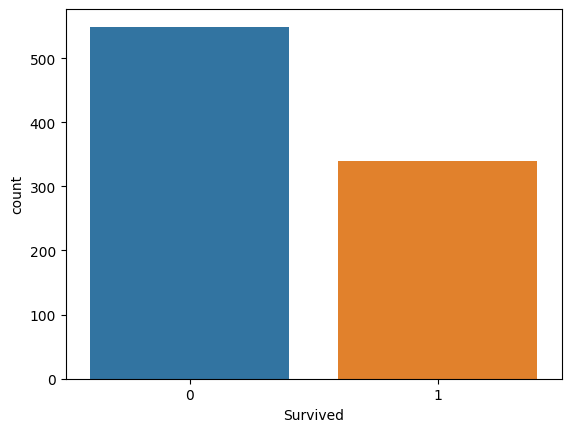

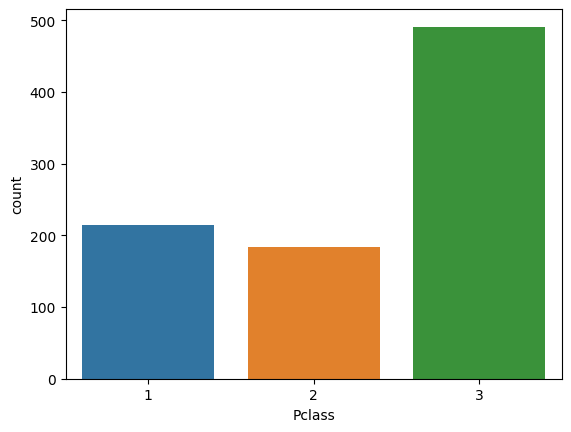

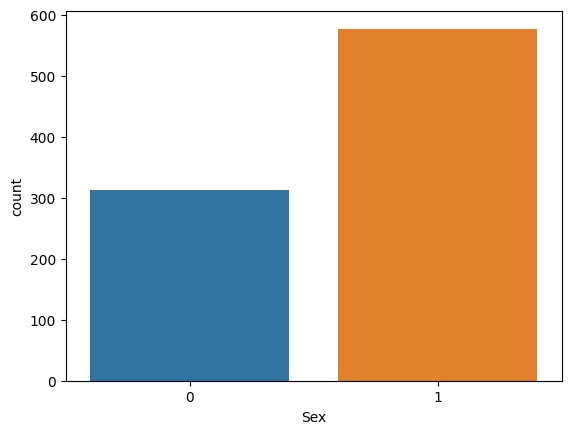

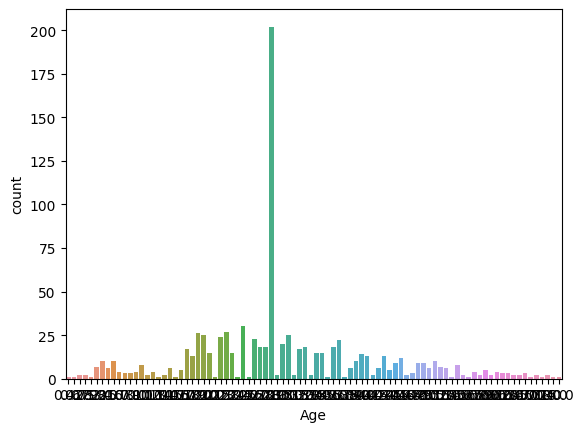

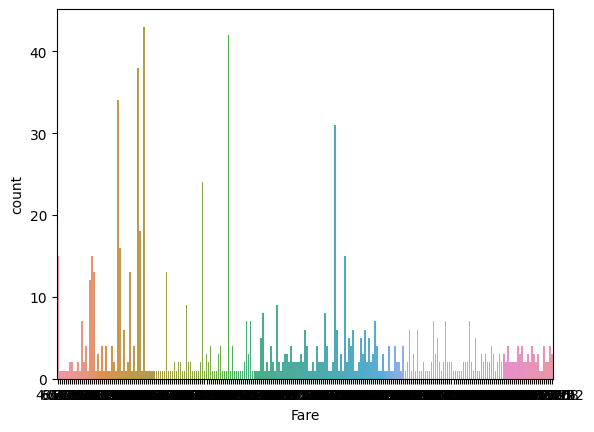

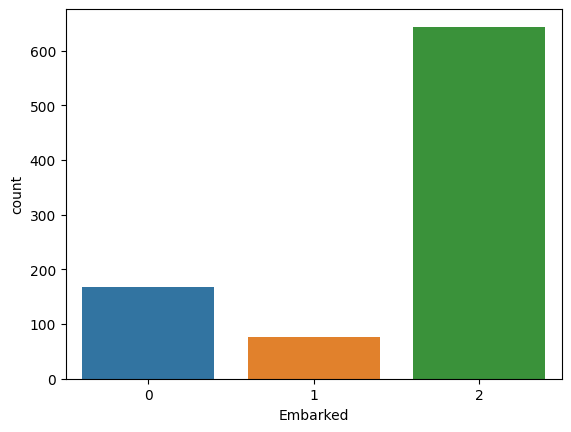

In [7]:
#-----------Visualization-------

def count_plot(feature):
    sns.countplot(x=feature, data=df1)
    plt.show()
    print("\n")
columns = ['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked']
for i in columns:
    count_plot(i)

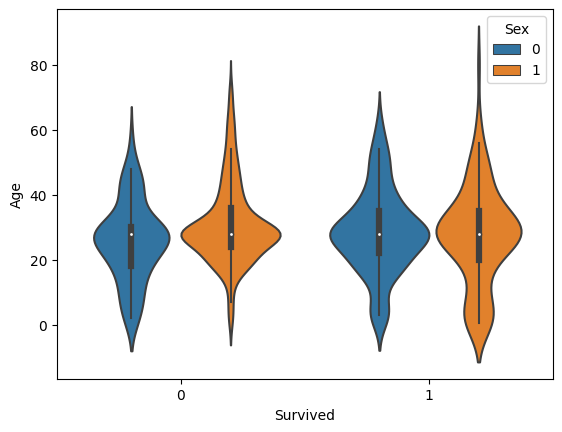

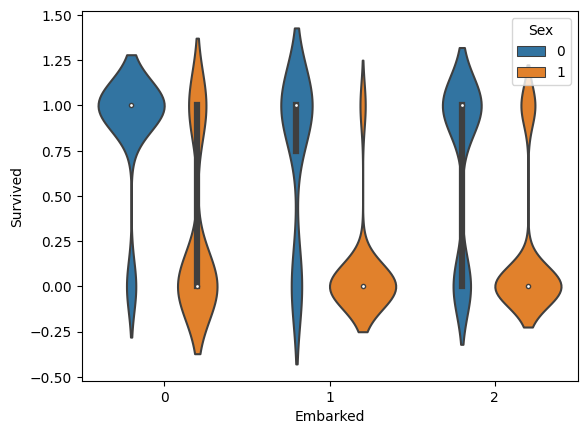

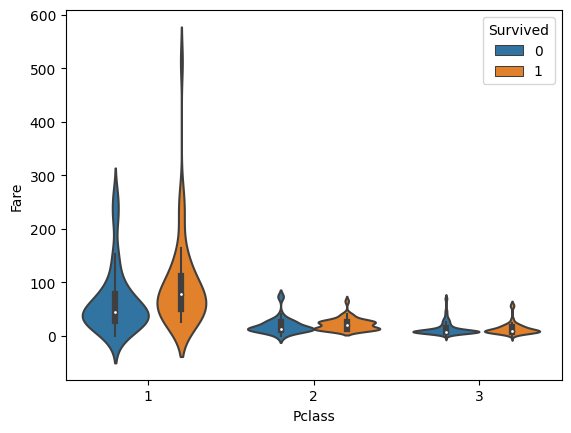

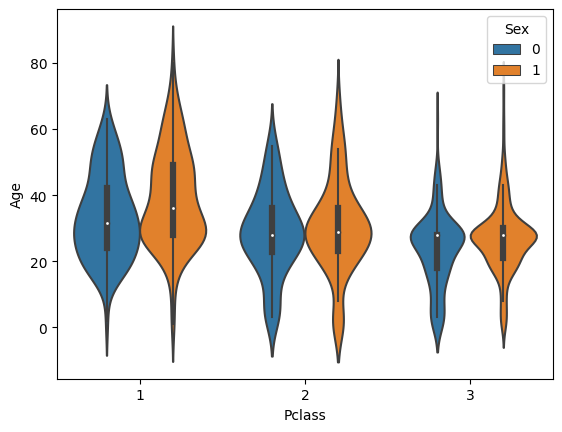

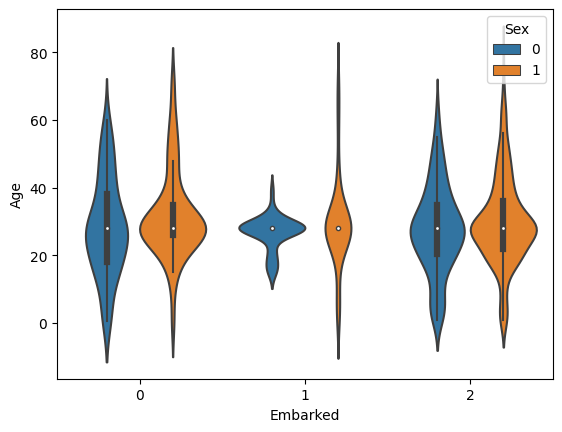

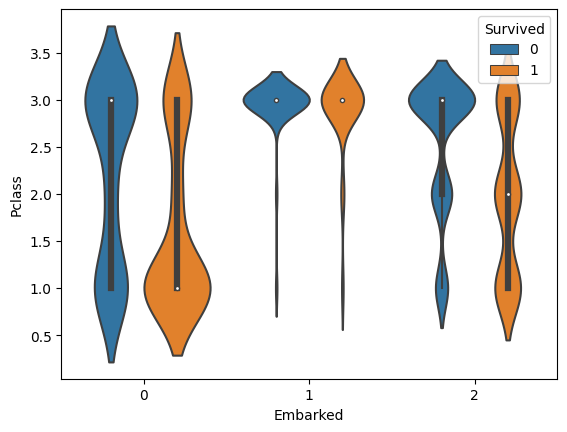

In [8]:
sns.violinplot(x='Survived' , y='Age' , hue= 'Sex', data=df1)
plt.show()
print("\n")

sns.violinplot(x='Embarked' , y='Survived' , hue='Sex' , data=df1)
plt.show()
print("\n")

sns.violinplot(x= 'Pclass', y= 'Fare', hue= 'Survived', data=df1)
plt.show()
print("\n")

sns.violinplot(x='Pclass' , y='Age' , hue='Sex' , data=df1)
plt.show()
print("\n")

sns.violinplot(x= 'Embarked', y='Age' , hue='Sex' , data=df1)
plt.show()
print("\n")

sns.violinplot(x= 'Embarked', y='Pclass' , hue= 'Survived', data=df1)
plt.show()
print("\n")

<Axes: ylabel='Frequency'>

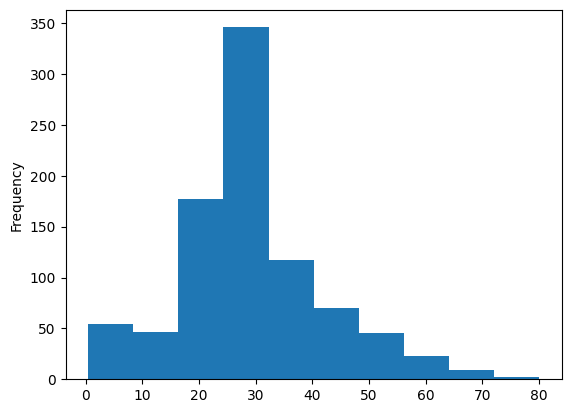

In [9]:
df1['Age'].plot(kind='hist')

In [10]:
# Model training
from sklearn import datasets
from sklearn.model_selection import train_test_split

X = df1.drop("Survived", axis=1)
Y = df1["Survived"]

In [20]:
print("-------------------------Model 1 SVM-----------------------")
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4)
svm = SVC(kernel='linear')

svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("Score :", (accuracy_score(y_test, y_pred))*100,"%")

expected = Y
predicted = svm.predict(X)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

-------------------------Model 1 SVM-----------------------
Score : 79.21348314606742 %
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       549
           1       0.74      0.68      0.71       340

    accuracy                           0.79       889
   macro avg       0.78      0.77      0.77       889
weighted avg       0.78      0.79      0.78       889

[[468  81]
 [109 231]]


In [12]:
print("-------------------------Model 2 Random Forest-----------------------")
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
forest = RandomForestClassifier()
forest.fit(X, Y)

print("Score : ",forest.score(X, Y)*100 , "%")
expected = Y
predicted = forest.predict(X)

print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

-------------------------Model 2 Random Forest-----------------------
Score :  97.75028121484814 %
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       549
           1       0.98      0.96      0.97       340

    accuracy                           0.98       889
   macro avg       0.98      0.97      0.98       889
weighted avg       0.98      0.98      0.98       889

[[543   6]
 [ 14 326]]


In [24]:
print("-------------------------Model 3 Logistic R-----------------------")
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5)
lr.fit(X_train, Y_train)

print("Accuracy: ", lr.score(X_test, Y_test) * 100)

expected = Y
predicted = lr.predict(X)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

-------------------------Model 3 Logistic R-----------------------
Accuracy:  78.65168539325843
              precision    recall  f1-score   support

           0       0.80      0.89      0.85       549
           1       0.79      0.65      0.71       340

    accuracy                           0.80       889
   macro avg       0.80      0.77      0.78       889
weighted avg       0.80      0.80      0.80       889

[[491  58]
 [119 221]]


In [34]:
print("-------------------------Model 4 KNN-----------------------")
from sklearn.neighbors import KNeighborsClassifier
knn =KNeighborsClassifier(algorithm='ball_tree')

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5)
knn.fit(X_train, Y_train)

print("Accuracy: ", knn.score(X_test, Y_test) * 100)

expected = Y
predicted = knn.predict(X)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

-------------------------Model 4 KNN-----------------------
Accuracy:  70.11235955056179
              precision    recall  f1-score   support

           0       0.77      0.81      0.79       549
           1       0.66      0.61      0.64       340

    accuracy                           0.73       889
   macro avg       0.72      0.71      0.71       889
weighted avg       0.73      0.73      0.73       889

[[442 107]
 [131 209]]


In [15]:
print("-------------------------Model 5 Naive Gauss-----------------------")
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print("Score :", (accuracy_score(y_test, y_pred))*100,"%")

expected = Y
predicted = nb.predict(X)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

-------------------------Model 5 Naive Gauss-----------------------
Score : 75.0561797752809 %
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       549
           1       0.78      0.59      0.67       340

    accuracy                           0.78       889
   macro avg       0.78      0.74      0.75       889
weighted avg       0.78      0.78      0.77       889

[[491  58]
 [140 200]]
